In [1]:
import numpy as np
import time
import scipy
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [2]:
def test_problem(n):
    np.random.seed(1)
    A = np.random.rand(n,n)*10
    x = np.random.rand(n)*10
    b = A@x
    return A,b,x

In [3]:
size = [12,16,20]

for i in size:
    A,b,solution = test_problem(i)
    start_time = time.time()
    aprox_sol = np.linalg.solve(A,b)
    end_time = time.time()
    print(f"for size {i}, it took {end_time-start_time} and the error is {np.linalg.norm(solution-aprox_sol)}")
    


for size 12, it took 0.00010919570922851562 and the error is 2.3983901086475624e-14
for size 16, it took 4.267692565917969e-05 and the error is 1.2437801936359966e-12
for size 20, it took 8.058547973632812e-05 and the error is 8.729941744838912e-14


In [4]:
# f coeff
for i in range(7):
    print("f = ",i**3,"a","+",i**2,"b","+", i,"c","+ d")
    rows = np.array((i**3))
    
# df coeff
for i in range(7):
    print("df = ",3*i**2,"a","+",2*i,"b","+ c")
    
# ddf coeff
for i in range(7):
    print("ddf = ",6*i,"a","+",2,"b")

f =  0 a + 0 b + 0 c + d
f =  1 a + 1 b + 1 c + d
f =  8 a + 4 b + 2 c + d
f =  27 a + 9 b + 3 c + d
f =  64 a + 16 b + 4 c + d
f =  125 a + 25 b + 5 c + d
f =  216 a + 36 b + 6 c + d
df =  0 a + 0 b + c
df =  3 a + 2 b + c
df =  12 a + 4 b + c
df =  27 a + 6 b + c
df =  48 a + 8 b + c
df =  75 a + 10 b + c
df =  108 a + 12 b + c
ddf =  0 a + 2 b
ddf =  6 a + 2 b
ddf =  12 a + 2 b
ddf =  18 a + 2 b
ddf =  24 a + 2 b
ddf =  30 a + 2 b
ddf =  36 a + 2 b


In [5]:
test_row = np.zeros((4*8))
for i in range(8):
    #print("f = ",i**3,"a","+",i**2,"b","+", i,"c","+ d")
    rows = np.array((i**3,i**2,i,1))
    test_row[4*i:4*(i+1)] = rows
    print(rows)

[0 0 0 1]
[1 1 1 1]
[8 4 2 1]
[27  9  3  1]
[64 16  4  1]
[125  25   5   1]
[216  36   6   1]
[343  49   7   1]


In [6]:
print(test_row)
#spline = np.zeros()

[  0.   0.   0.   1.   1.   1.   1.   1.   8.   4.   2.   1.  27.   9.
   3.   1.  64.  16.   4.   1. 125.  25.   5.   1. 216.  36.   6.   1.
 343.  49.   7.   1.]


In [7]:
def plot_side_by_side(obj_1,obj_2,plot_size):
    plt.figure(figsize=plot_size, dpi=80)
    plt.subplot(1,3,1)
    plt.imshow(obj_1)
    plt.title("Original")
    plt.subplot(1,3,3)
    plt.imshow(obj_2)
    plt.title(f"Ïnerp, res = {obj_2.shape}")

## RECTBIVARIATESPLINE

In [8]:
def interfunk(factor,n,obj,denosing_on_off,noise_fac_1,noise_fac_2):
    #making interpolation function
    x = np.arange(n)
    y = x 
    z = obj

    #construction interpolation function 
    interpolation_funk = scipy.interpolate.RectBivariateSpline(x,y,z)
    
    #using interpolation
    new_res = factor*n-(factor-1)
    x_new = (np.arange(new_res))/factor
    y_new = x_new
    Z_new = interpolation_funk(x_new,y_new)
    Z_new = np.round(Z_new,1)
    
    #denoising 
    if denosing_on_off:
        obj_new = np.where(Z_new>noise_fac_1,Z_new,0)
        obj_new = np.where(obj_new<noise_fac_2,obj_new,1)
    else:
        obj_new = Z_new
    
    return obj_new

## Objects

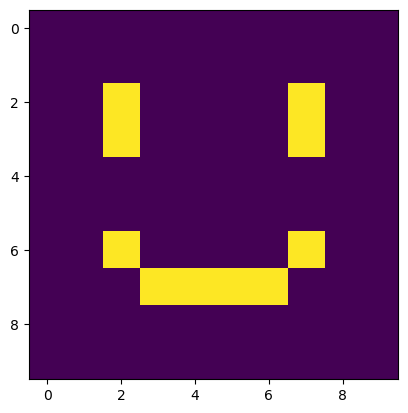

In [9]:
n = 10
smile = np.zeros((n,n))
a = 1
smile[2,2] = a
smile[3,2] = a
smile[2,7] = a
smile[3,7] = a
smile[6,2] = a
smile[6,7] = a
smile[7,3:7] = a


plt.imshow(smile)
plt.show()



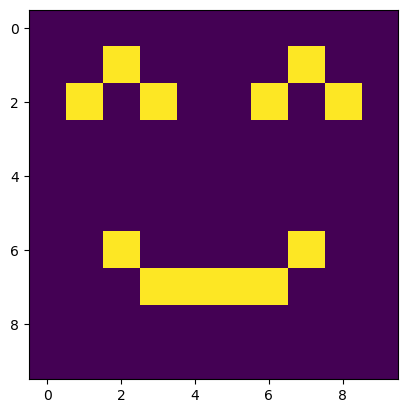

In [10]:
n = 10
happy = np.zeros((n,n))
a = 1
happy[1,2] = a
happy[1,7] = a
happy[2,1] = a
happy[2,3] = a
happy[2,6] = a
happy[2,8] = a
happy[7,3:7] = a
happy[6,2] = a
happy[6,7] = a


plt.imshow(happy)
plt.show()

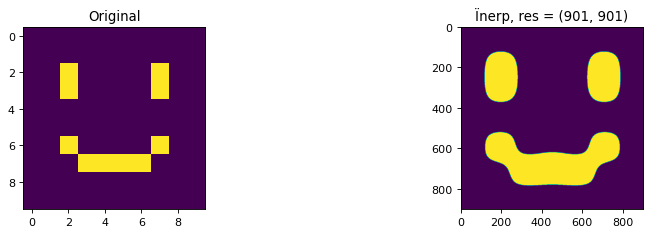

In [11]:
denosing = True
smile_new = interfunk(100,n,smile,denosing,0.2,0.1)

plot_side_by_side(smile,smile_new,(10, 6))

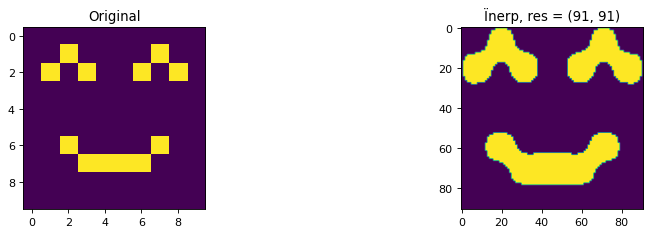

In [12]:
denosing = True
happy_new = interfunk(10,n,happy,denosing,0.2,0.1)

plot_side_by_side(happy,happy_new,(10, 6))

## Matrix constrion

In [13]:
#importing data
X = np.genfromtxt("data/test_matriser.txt", delimiter=",") # hode og hånd
X = X[~np.isnan(X)]
Y = np.genfromtxt("data/test_matriser_2.txt", delimiter=",") # hode og hånd
Y = Y[~np.isnan(Y)]


X = X.reshape(int(X.shape[0]/64),8,8)#antall,dim_1,dim_2
X = X[:,::-1,:]

Y = Y.reshape(int(Y.shape[0]/64),8,8)#antall,dim_1,dim_2
Y = Y[:,::-1,:]

In [14]:
def animated_interolation(obj1,obj2):
    state = obj1.shape[1] >8
    array_len = obj1.shape[0]
    
    # initialization 
    zeros = np.zeros((obj1.shape[1],obj1.shape[1]))
    zeros_small = np.zeros((obj2.shape[1],obj2.shape[1]))
    ims = []
    ims2 = []
    
    # plotting
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
    fig.tight_layout(pad=1)#finn noe bedre
    ax[0].set_title("Heatplot with interpolation")
    ax[1].set_title("Heatplot with no interpolation")

    # animating
    for i in range(array_len):
        if state :
            im = ax[0].imshow(obj1[i], animated=True,interpolation='none')
            im2 = ax[1].imshow(obj2[i], animated=True,interpolation='none')
        else:
            im = ax[0].imshow(obj1[i], animated=True,interpolation='bicubic')
            im2 = ax[1].imshow(obj2[i], animated=True,interpolation='none')
            
        if i == 0:
            im = ax[0].imshow(zeros)
            im2 = ax[1].imshow(zeros) 
            
        ims.append([im])
        ims2.append([im2])
        
    cax = plt.axes([0.06, 0.2, 0.9, 0.05])
    plt.colorbar(im,cax=cax,orientation = "horizontal")
    
    ani = animation.ArtistAnimation(fig, ims, interval=500, #interval = how long frame last
                                    blit=True,
                                    repeat_delay=1000)
    
    ani2 = animation.ArtistAnimation(fig, ims2, interval=500, #interval = how long frame last
                                    blit=True,
                                    repeat_delay=1000)
    return ani,ani2,fig

# Stored feed matplotlib interpolation

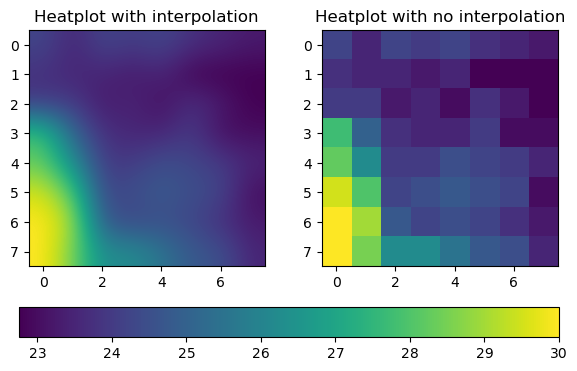

In [16]:
outer_ani,outer_ani2,fig = animated_interolation(Y,Y)
outer_ani.save("interp_matplotlib.mp4")
outer_ani2.save("no_interp_matplotlib.mp4")
plt.show()

## Stored feed scipy interpolation

In [25]:
def interp_data(interp_fac,obj):
    res_size = 8
    array_len = obj.shape[0]

    new_res = interp_fac*(res_size-1)+1
    new_object_array = np.zeros((array_len,new_res,new_res))
    
    for i in range(array_len):
        new_object_array[i,:,:] = interfunk(interp_fac,res_size,obj[i],False,0,0)
    return new_object_array

In [26]:
interp_fac = 2
new_object_array = interp_data(interp_fac,Y)

(32, 15, 15)


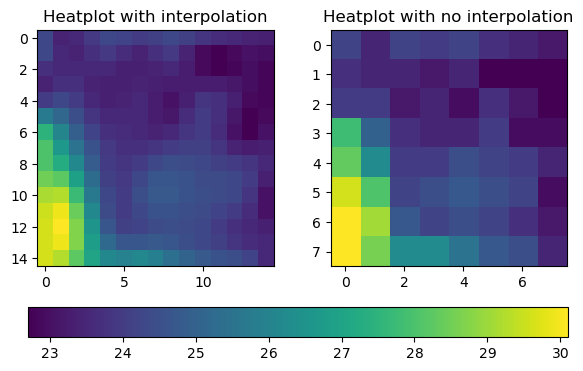

In [27]:
outer_ani,outer_ani2  = animated_interolation(new_object_array,Y)
outer_ani.save("")
outer_ani2.save("")
plt.show()